### Approach to Fashion MNIST Dataset
1. Load the data and load the libraries
2. Visualize the Data
3. Separate the images and labels
4. Train and Test Split
5. Create a Sequential Model
6. Combination of Dense Layers and Dropout
7. Compile the model
8. Fit the model
9. Evaluate the model
10. Learn more about Convolutional Neural Networks

Import the libraries and the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

Import the data

In [ ]:
!unzip '/content/archive.zip'

Archive:  /content/archive.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [ ]:
train_df = pd.read_csv('/content/fashion-mnist_train.csv')
test_df = pd.read_csv('/content/fashion-mnist_test.csv')

In [ ]:
print(train_df.shape)
print(test_df.shape)

(60000, 785)
(10000, 785)


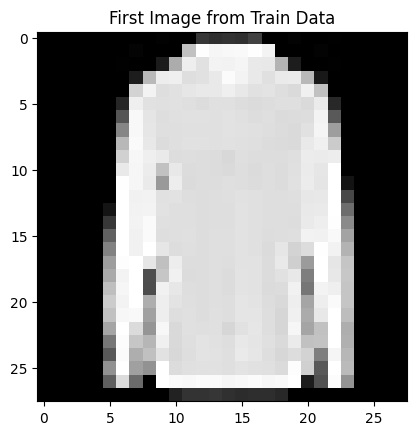

In [ ]:
# Extract pixel values for the first image
first_image_pixels = train_df.iloc[40, 1:].values  # Exclude the label column (first column)

# Reshape the pixel values into a 28x28 image
image = first_image_pixels.reshape(28, 28)

# Display the image
plt.imshow(image, cmap='gray')
plt.title('First Image from Train Data')
plt.show()

# You can also print the pixel values if needed:
# print(first_image_pixels)

Create X (Images) and Y (Labels)

In [ ]:
images = train_df.drop('label', axis=1).values
labels = train_df['label'].values

In [ ]:
images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
labels

array([2, 9, 6, ..., 8, 8, 7])

Train and Test split of the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


Create a Sequential Model

In [ ]:
model = Sequential()
#Input Layer
model.add(Dense(256, activation='relu', input_shape=(784,)))
#Dropout Layer
model.add(Dropout(0.2))
#Hidden Layer 1
model.add(Dense(256, activation='relu'))
#Dropout Layer
model.add(Dropout(0.2))
#Hidden Layer 2
model.add(Dense(256, activation='relu'))
#Dropout Layer
model.add(Dropout(0.2))
#ouptut Layer
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Fit the model

In [ ]:
hist = model.fit(x_train, to_categorical(y_train), epochs = 50, validation_split = 0.2)

Epoch 1/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5518 - loss: 8.1302 - val_accuracy: 0.7054 - val_loss: 0.7460
Epoch 2/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6821 - loss: 0.8483 - val_accuracy: 0.7541 - val_loss: 0.6258
Epoch 3/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7289 - loss: 0.7266 - val_accuracy: 0.7848 - val_loss: 0.5989
Epoch 4/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7452 - loss: 0.6969 - val_accuracy: 0.7593 - val_loss: 0.6148
Epoch 5/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7461 - loss: 0.6926 - val_accuracy: 0.8140 - val_loss: 0.5526
Epoch 6/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7656 - loss: 0.6624 - val_accuracy: 0.8144 - val_loss: 0.5249
Epoch 7/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7718 - loss: 0.6141 - val_accuracy: 0.8104 - val_loss: 0.5293
Epoch 8/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7658 - loss: 0

Visualization of the epochs

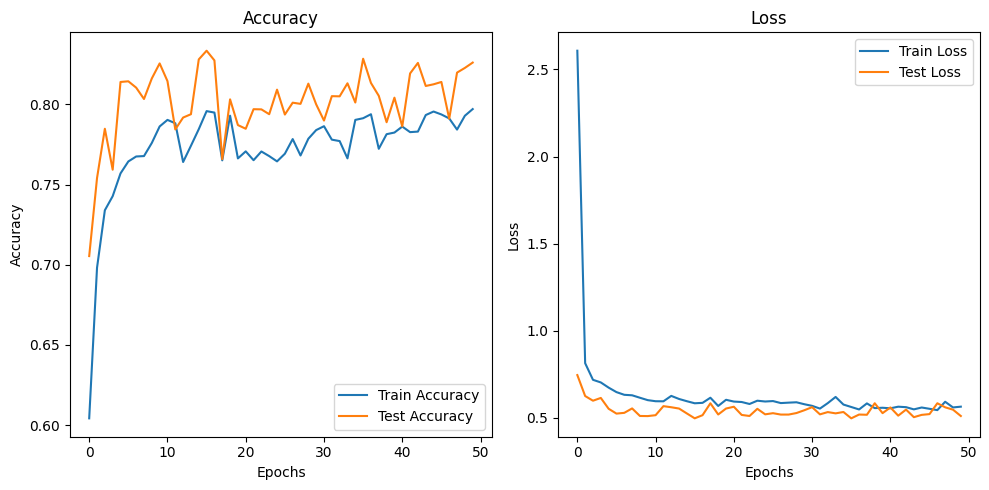

In [ ]:
# Plot the accuracy and loss metrics
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()


Evaluation of the model outputs

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def model_eval(actual, predicted):
  print(classification_report(actual, predicted))
  print(confusion_matrix(actual, predicted))
  print(accuracy_score(actual, predicted))

In [ ]:
y_hat_train = np.argmax(model.predict(x_train), axis = 1)
y_hat_test = np.argmax(model.predict(x_test), axis = 1)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


Train Eval

In [ ]:
model_eval(y_train, y_hat_train)

              precision    recall  f1-score   support

           0       0.75      0.89      0.81      4768
           1       1.00      0.97      0.98      4826
           2       0.61      0.84      0.70      4800
           3       0.89      0.87      0.88      4758
           4       0.60      0.54      0.57      4815
           5       0.97      0.98      0.98      4859
           6       0.69      0.39      0.50      4757
           7       0.96      0.94      0.95      4776
           8       0.95      0.98      0.96      4851
           9       0.96      0.97      0.96      4790

    accuracy                           0.84     48000
   macro avg       0.84      0.83      0.83     48000
weighted avg       0.84      0.84      0.83     48000

[[4243    2   52  125   26    0  269    1   50    0]
 [  15 4674    4  109   12    0    7    0    5    0]
 [  60    0 4015   21  511    0  146    0   47    0]
 [ 165    8   57 4119  298    0   96    0   15    0]
 [  10    2 1750  140 2578   

In [ ]:
model_eval(y_test, y_hat_test)

              precision    recall  f1-score   support

           0       0.74      0.88      0.80      1232
           1       0.99      0.96      0.97      1174
           2       0.61      0.85      0.71      1200
           3       0.86      0.86      0.86      1242
           4       0.58      0.51      0.55      1185
           5       0.94      0.96      0.95      1141
           6       0.67      0.37      0.48      1243
           7       0.95      0.94      0.94      1224
           8       0.93      0.97      0.95      1149
           9       0.96      0.95      0.96      1210

    accuracy                           0.82     12000
   macro avg       0.82      0.83      0.82     12000
weighted avg       0.82      0.82      0.82     12000

[[1082    1    5   46    8    0   79    0   10    1]
 [   1 1124    1   40    3    0    5    0    0    0]
 [   8    0 1020    8  116    0   33    0   15    0]
 [  47    7   16 1064   81    0   21    0    6    0]
 [   2    1  441   38  610   